In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import glob
import seaborn as sns
%matplotlib inline

### Formatting Data

In [2]:
data = pd.read_csv('Robintrack-output.csv')
data.set_index('Week',inplace=True)

In [3]:
data.head(5)

,A,AA,AAAU,AACAY,AACG,AADR,AAGIY,AAL,AAMC,AAME,...,ZTO,ZTR,ZTS,ZUMZ,ZUO,ZURVY,ZVO,ZYME,ZYNE,ZYXI
Week,,,,,,,,,,,,,,,,,,,,,
1,12,0,8,5,54,0,1,332,0,1,...,-9,14,-4,-2,-2,-2,0,5,428,0
2,-10,0,0,6,1,0,0,605,0,2,...,-11,7,9,-5,1,0,0,5,184,0
3,-3,0,-4,4,20,0,-2,-180,0,-2,...,4,3,0,-3,27,-2,0,10,121,0
4,-6,0,7,6,109,0,1,-22,0,-2,...,1,5,2,-6,1,1,0,-3,643,0
5,-6,0,7,6,109,0,1,-22,0,-2,...,1,5,2,-6,1,1,0,-3,643,0


In [4]:
data = data.T

In [5]:
#drop the entire colume or row that has NA
#data = data.replace([np.inf, -np.inf], np.nan).dropna(how="all")
data.dropna(how='all', inplace=True)

In [6]:
#make the index ticker the index
data['Ticker'] = data.index

In [7]:
# obtain the ticker colume from quandltickers
quandltickers = pd.read_csv('QUANDL-TICKERS.csv')
quandltickers = quandltickers[['Ticker']]
quandltickers.head()

,Ticker
0,A
1,AA
2,AAAU
3,AACG
4,AADR


In [8]:
# only keep Robinhood data that are in the quandl tickers, majority is in there
data1 = data[data['Ticker'].isin(quandltickers['Ticker'])]
data1.dropna(how='all', inplace=True)
data1

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,Ticker
A,12,-10,-3,-6,-6,8,17,37,9,4,...,-13,-14,6,36,-24,-25,15,5,5,A
AA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AA
AAAU,8,0,-4,7,7,5,16,12,5,5,...,-2,-1,-6,1,-5,-6,1,-7,5,AAAU
AACG,54,1,20,109,109,-7,46,12,67,21,...,-11,-5,-12,-18,3,-27,-11,1,-16,AACG
AADR,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,AADR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUO,-2,1,27,1,1,31,6,-18,31,-44,...,-21,-15,-24,8,-29,11,-32,-11,-14,ZUO
ZVO,0,0,0,0,0,0,0,0,0,0,...,56,0,2,0,1,19,-8,-5,1,ZVO
ZYME,5,5,10,-3,-3,-4,0,0,7,4,...,20,0,-8,33,30,-8,-16,0,-3,ZYME
ZYNE,428,184,121,643,643,718,52,398,246,154,...,-121,-1,106,321,64,19,138,394,27,ZYNE


### Sell Portfolios

#### Construcing the Top Volume Tickers & Top Volume Value DataFrames

In [9]:
# create empty df to contain the concatination, just like creating empty list
sellportfolio = pd.DataFrame()

for r in range(1,50,4):
    tmp = data1.sort_values(by=[r], ascending=False)[:10] # the index of data1 is ticker, we sort it by[1] first column 
    #and take the top 10 tickers
    tmp1 = pd.DataFrame(tmp[r].index) # then we do temp[1].index is getting the index (tickers)
    tmp1.columns = [r] # rename the column title to week 1 
    sellportfolio = pd.concat([sellportfolio, tmp1], axis=1)# axis=1 concatinate along columns
sellportfolio

,1,5,9,13,17,21,25,29,33,37,41,45,49
0,AAPL,CRON,IGC,LYFT,TSLA,TSLA,WORK,NFLX,GE,ACB,GPRO,UBER,GPRO
1,ACB,ACB,GE,ACB,PINS,HEXO,CTST,MSFT,FIT,SDC,PCG,CHK,PTON
2,GE,APHA,ACB,HEXO,ACB,S,LK,CTST,UBER,NET,PLUG,GPRO,ACB
3,CRON,HEXO,FIT,CPRX,F,CTST,ACB,ACB,ACB,SBUX,NAT,PRTY,ONTX
4,CGC,MSFT,HEXO,YETI,HEXO,BABA,CHWY,TRQ,AMD,GE,BBBY,ROKU,IBIO
5,TSLA,TSLA,NIO,CTST,DIS,BCRX,HEXO,DIS,LK,T,APHA,NIO,AUPH
6,F,AVCO,BILI,PLUG,ZM,LK,NIO,ZNGA,CGC,FCEL,ROKU,CGC,SAGE
7,GNMX,CGC,KHC,APHA,MSFT,FIT,CGC,CHK,GHSI,MSFT,UBER,DIS,ROKU
8,MSFT,F,CTST,ZNGA,ZNGA,GE,MGI,SBUX,GPRO,FIT,ADXS,EXPE,PLUG
9,GSAT,GE,IMGN,BA,INTC,JCP,FB,AVRO,HEXO,CPRX,NIO,ANAB,AMZN


In [10]:
data1.reset_index(inplace=True) # reset index replace old index with new numeric 012345 index for data 1
data1.head()

Week,index,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,Ticker
0,A,12,-10,-3,-6,-6,8,17,37,9,...,-13,-14,6,36,-24,-25,15,5,5,A
1,AA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AA
2,AAAU,8,0,-4,7,7,5,16,12,5,...,-2,-1,-6,1,-5,-6,1,-7,5,AAAU
3,AACG,54,1,20,109,109,-7,46,12,67,...,-11,-5,-12,-18,3,-27,-11,1,-16,AACG
4,AADR,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,AADR


In [11]:
# find the top 10 bought stocks for each week and display the volume
sellvol = []
i = 1
while i < 52:
    a = data1.sort_values(by=[i], ascending=False)[:10] #sorting data value by # of account purchased
    a.reset_index(inplace=True)# reset the index
    templist = a[i].tolist()# make a into a list
    sellvol.append(templist)
    i = i + 4
sellvol = pd.DataFrame(sellvol) # transform it into a dataframe
sellvol

,0,1,2,3,4,5,6,7,8,9
0,15188,8834,7548,4041,3691,3443,2988,2494,2111,1887
1,12790,11348,5521,4401,3928,3503,3368,3015,2967,2646
2,42842,11131,10776,9688,9093,7850,4087,4057,3893,3709
3,24074,8361,6138,6048,4220,2429,2353,1766,1711,1646
4,12820,11705,11374,10114,9695,8681,6605,6483,4437,3479
5,6146,5539,4061,3501,3304,2454,2335,2078,1851,1824
6,44841,6185,5999,4437,3813,3690,3102,2883,2378,2169
7,13334,11575,9028,6850,4539,3649,3218,2866,2612,2164
8,6682,5745,4509,4306,3200,2182,2180,2119,1900,1835
9,8423,4709,3823,3615,3353,3171,3023,2741,2400,2201


In [12]:
sellportfolio1 = sellportfolio.T #transform ticker matrix so that it is consistant with the volume matrix
sellportfolio1

,0,1,2,3,4,5,6,7,8,9
1,AAPL,ACB,GE,CRON,CGC,TSLA,F,GNMX,MSFT,GSAT
5,CRON,ACB,APHA,HEXO,MSFT,TSLA,AVCO,CGC,F,GE
9,IGC,GE,ACB,FIT,HEXO,NIO,BILI,KHC,CTST,IMGN
13,LYFT,ACB,HEXO,CPRX,YETI,CTST,PLUG,APHA,ZNGA,BA
17,TSLA,PINS,ACB,F,HEXO,DIS,ZM,MSFT,ZNGA,INTC
21,TSLA,HEXO,S,CTST,BABA,BCRX,LK,FIT,GE,JCP
25,WORK,CTST,LK,ACB,CHWY,HEXO,NIO,CGC,MGI,FB
29,NFLX,MSFT,CTST,ACB,TRQ,DIS,ZNGA,CHK,SBUX,AVRO
33,GE,FIT,UBER,ACB,AMD,LK,CGC,GHSI,GPRO,HEXO
37,ACB,SDC,NET,SBUX,GE,T,FCEL,MSFT,FIT,CPRX


In [13]:
sellportfolio1['Week'] = sellportfolio1.index # create a new column called week using the index
sellportfolio1

,0,1,2,3,4,5,6,7,8,9,Week
1,AAPL,ACB,GE,CRON,CGC,TSLA,F,GNMX,MSFT,GSAT,1
5,CRON,ACB,APHA,HEXO,MSFT,TSLA,AVCO,CGC,F,GE,5
9,IGC,GE,ACB,FIT,HEXO,NIO,BILI,KHC,CTST,IMGN,9
13,LYFT,ACB,HEXO,CPRX,YETI,CTST,PLUG,APHA,ZNGA,BA,13
17,TSLA,PINS,ACB,F,HEXO,DIS,ZM,MSFT,ZNGA,INTC,17
21,TSLA,HEXO,S,CTST,BABA,BCRX,LK,FIT,GE,JCP,21
25,WORK,CTST,LK,ACB,CHWY,HEXO,NIO,CGC,MGI,FB,25
29,NFLX,MSFT,CTST,ACB,TRQ,DIS,ZNGA,CHK,SBUX,AVRO,29
33,GE,FIT,UBER,ACB,AMD,LK,CGC,GHSI,GPRO,HEXO,33
37,ACB,SDC,NET,SBUX,GE,T,FCEL,MSFT,FIT,CPRX,37


In [14]:
# read the csv file that contains the robin track dates corresponding the the week number
date = pd.read_csv('Robintrack-DATES.csv')
date = date[['Date', 'Week']]
date.head(3)

,Date,Week
0,12/28/2018,0
1,1/4/2019,1
2,1/11/2019,2


In [15]:
# obtain date corresponding the week number from robin data, and merge it with ticker matrix
sellportfolio1 = pd.merge(sellportfolio1, date[['Week','Date']], on=['Week'], how='left')
sellportfolio1['Date'] = pd.to_datetime(sellportfolio1['Date'])
sellportfolio1

,0,1,2,3,4,5,6,7,8,9,Week,Date
0,AAPL,ACB,GE,CRON,CGC,TSLA,F,GNMX,MSFT,GSAT,1,2019-01-04
1,CRON,ACB,APHA,HEXO,MSFT,TSLA,AVCO,CGC,F,GE,5,2019-02-01
2,IGC,GE,ACB,FIT,HEXO,NIO,BILI,KHC,CTST,IMGN,9,2019-03-01
3,LYFT,ACB,HEXO,CPRX,YETI,CTST,PLUG,APHA,ZNGA,BA,13,2019-03-29
4,TSLA,PINS,ACB,F,HEXO,DIS,ZM,MSFT,ZNGA,INTC,17,2019-04-26
5,TSLA,HEXO,S,CTST,BABA,BCRX,LK,FIT,GE,JCP,21,2019-05-24
6,WORK,CTST,LK,ACB,CHWY,HEXO,NIO,CGC,MGI,FB,25,2019-06-21
7,NFLX,MSFT,CTST,ACB,TRQ,DIS,ZNGA,CHK,SBUX,AVRO,29,2019-07-19
8,GE,FIT,UBER,ACB,AMD,LK,CGC,GHSI,GPRO,HEXO,33,2019-08-16
9,ACB,SDC,NET,SBUX,GE,T,FCEL,MSFT,FIT,CPRX,37,2019-09-13


### Pulling Quandl Data for all Shorting Tickers

In [16]:
#keep only column 0-9
shorttickers = sellportfolio1[[0,1,2,3,4,5,6,7,8,9]]
shorttickers

,0,1,2,3,4,5,6,7,8,9
0,AAPL,ACB,GE,CRON,CGC,TSLA,F,GNMX,MSFT,GSAT
1,CRON,ACB,APHA,HEXO,MSFT,TSLA,AVCO,CGC,F,GE
2,IGC,GE,ACB,FIT,HEXO,NIO,BILI,KHC,CTST,IMGN
3,LYFT,ACB,HEXO,CPRX,YETI,CTST,PLUG,APHA,ZNGA,BA
4,TSLA,PINS,ACB,F,HEXO,DIS,ZM,MSFT,ZNGA,INTC
5,TSLA,HEXO,S,CTST,BABA,BCRX,LK,FIT,GE,JCP
6,WORK,CTST,LK,ACB,CHWY,HEXO,NIO,CGC,MGI,FB
7,NFLX,MSFT,CTST,ACB,TRQ,DIS,ZNGA,CHK,SBUX,AVRO
8,GE,FIT,UBER,ACB,AMD,LK,CGC,GHSI,GPRO,HEXO
9,ACB,SDC,NET,SBUX,GE,T,FCEL,MSFT,FIT,CPRX


In [17]:
# stack all the tickers in the above table into one long column
shorttickerlist = shorttickers.stack().reset_index()
shorttickerlist = shorttickerlist[[0]]
shorttickerlist # contains all the tickers in the ticker matrix 10 x 12

,0
0,AAPL
1,ACB
2,GE
3,CRON
4,CGC
...,...
125,AUPH
126,SAGE
127,ROKU
128,PLUG


In [18]:
shorttickerlist = shorttickerlist[0].unique() #keep only the unique ones from tickerlist
shorttickercount = pd.DataFrame(shorttickerlist)

In [19]:
import quandl
quandl.ApiConfig.api_key = 's-bsuqptLiUnnKtWKKUP'

In [20]:
shortpricedata = {}  # set up the dictionary 
for s in shorttickerlist:
    shortpricedata[s] = quandl.get("EOD/"+s, start_date="2018-12-01", end_date="2019-12-31") # for US stocks: quandl.get("EOD/"+s) 

In [21]:
# Create a price and trade volume dataframe
prc = pd.DataFrame()  # where to store the price data
for s in shorttickerlist:
    # get the returns
    tmp = shortpricedata[s][['Adj_Close']]  # IMPORTANT: if US stocks, use Adj_Close (includes dividends)
    tmp.columns = [s]  # renaming the column with TICKER name
    prc = pd.concat([prc, tmp], axis=1)
    prc = prc[prc.index.weekday < 5]  # get rid of weekend observations

In [22]:
prc.head()

,AAPL,ACB,GE,CRON,CGC,TSLA,F,GNMX,MSFT,GSAT,...,ADXS,PRTY,EXPE,ANAB,PTON,ONTX,IBIO,AUPH,SAGE,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-03,181.638743,5.69,7.484249,10.17,33.33,358.490,8.854269,1.080,110.526174,0.3800,...,6.580497,11.71,118.808284,72.25,NaN,4.13,0.8000,6.21,115.96,1772.36
2018-12-04,173.648682,5.40,6.976355,10.74,31.45,359.700,8.466895,1.100,107.005981,0.3658,...,6.185997,11.30,116.966829,69.08,NaN,3.93,0.7600,6.15,108.47,1668.40
2018-12-06,171.712591,5.28,7.043435,10.45,30.34,363.060,8.319324,1.070,107.666633,0.3662,...,5.911497,10.55,118.808284,71.59,NaN,3.68,0.7600,6.28,105.88,1699.19
2018-12-07,165.589827,5.75,6.717617,12.72,31.40,357.965,8.134860,1.195,103.357601,0.3580,...,5.698497,10.39,116.435073,71.98,NaN,3.68,0.7124,6.12,102.68,1629.13
2018-12-10,166.680721,5.73,6.640953,12.88,31.02,365.150,7.858164,1.180,106.088956,0.3334,...,5.549997,10.30,116.966829,70.81,NaN,3.62,0.7200,6.05,107.55,1641.03


### Formatting Our Monthly Weighted Investments

In [23]:
#transpose
monthvol = sellvol.T
monthvol

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,15188,12790,42842,24074,12820,6146,44841,13334,6682,8423,6086,10444,7385
1,8834,11348,11131,8361,11705,5539,6185,11575,5745,4709,3896,7545,6213
2,7548,5521,10776,6138,11374,4061,5999,9028,4509,3823,2484,5919,3457
3,4041,4401,9688,6048,10114,3501,4437,6850,4306,3615,1582,5803,3339
4,3691,3928,9093,4220,9695,3304,3813,4539,3200,3353,1281,5344,3238
5,3443,3503,7850,2429,8681,2454,3690,3649,2182,3171,1230,4562,3206
6,2988,3368,4087,2353,6605,2335,3102,3218,2180,3023,1147,3123,2571
7,2494,3015,4057,1766,6483,2078,2883,2866,2119,2741,1127,3079,2289
8,2111,2967,3893,1711,4437,1851,2378,2612,1900,2400,1081,2716,2169
9,1887,2646,3709,1646,3479,1824,2169,2164,1835,2201,1081,2632,1704


In [24]:
# calculate how much we should put into each stock if our initial investment is 500k
monthAlloc = (monthvol / monthvol.sum())*500000
monthAlloc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,145409.286740,119561.762671,199960.793832,204899.056957,75064.700854,92859.517118,282029.510548,111423.080137,96399.099775,112429.589685,144939.271255,102057.967049,103806.471564
1,84576.352322,106081.851665,51952.840580,71162.291901,68536.062675,83688.393316,38900.839025,96724.325228,82881.297247,62855.388558,92783.996190,73729.161374,87332.377499
2,72264.241264,51610.671752,50295.913224,52241.854765,66597.964704,61357.386759,37730.983559,75440.795521,65049.916325,51029.125177,59156.942129,57840.014072,48592.954935
3,38688.367640,41140.837961,45217.780931,51475.845164,59220.310798,52896.382921,27906.713461,57240.745383,62121.299556,48252.756347,37675.637056,56706.470968,46934.300413
4,35337.482049,36719.202797,42440.677333,35917.339053,56766.948111,49919.922642,23982.037058,37929.305590,46165.387501,44755.599455,30507.263634,52221.158168,45514.604594
5,32963.140258,32746.274796,36639.097885,20673.748000,50829.693300,37077.327532,23208.422959,30492.186847,31479.023602,42326.276729,29292.688735,44579.514140,45064.799978
6,28606.988990,31484.285901,19075.667905,20026.895448,38674.130198,35279.364216,19510.170195,26890.615860,31450.170235,40350.783523,27316.027626,30517.716497,36138.989626
7,23877.453327,28184.418644,18935.645875,15030.810608,37959.785931,31396.367812,18132.759727,23949.193616,30570.142536,36586.668090,26839.723744,30087.751871,32175.086447
8,20210.627094,27735.711481,18170.192110,14562.693630,25979.881255,27966.639471,14956.539240,21826.690064,27410.698829,32035.024961,25744.224815,26540.543710,30488.319136
9,18066.060316,24734.982332,17311.390325,14009.464474,20370.522174,27558.698214,13642.024227,18083.061753,26472.964395,29378.787474,25744.224815,25719.702152,23952.095808


### Formatting Our DataFrame to turn create a row for each data for each stock for easy identification

In [25]:
# for all the 12 intervals (4 week per interval) we get the price for all stocks we have for that day
filterprice = prc[prc.index.isin(sellportfolio1['Date'])] # only price that is on date of our ticker date to easy call rows in final loop 
filterprice = filterprice.T
date = filterprice.columns
date = pd.DataFrame(date)
date = date.T
date.columns = date.loc['Date']
filterprice = filterprice.append(date)
filterprice.loc['Date'] = pd.to_datetime(filterprice.loc['Date'], format='%Y-%m-%d')
filterprice = filterprice[:66]
filterprice

Date,2019-01-04,2019-02-01,2019-03-01,2019-03-29,2019-04-26,2019-05-24,2019-06-21,2019-07-19,2019-08-16,2019-09-13,2019-10-11,2019-11-08,2019-12-06
AAPL,145.708,163.654,172.695,187.48,201.644,177.333,196.961,200.737,205.395,217.579,234.946,259.516,270.06
ACB,5.22,7.4,7.34,9.06,9.04,8.31,7.3,6.84,5.99,5.95,3.68,3.81,2.43
GE,7.89703,9.77773,10.2291,9.9502,9.53188,9.41236,10.4383,10.0095,8.76332,9.32162,8.78269,11.4973,11.0782
CRON,11.78,20.81,21.71,18.43,17.16,15.38,15.94,14.97,12.11,11.53,7.845,8.52,6.71
CGC,28.23,48.88,47.05,43.37,49.91,44.42,40.16,35.49,28.11,27.46,19.43,21.46,18.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ONTX,2.51,3.36,3.4,3.3,3.97,3.18,3.75,2.3,2.15,2.5,0.785,0.4666,0.35
IBIO,0.8025,0.855,0.91,0.873,0.81,0.809,0.765,0.72,0.6999,0.6305,0.45,0.1529,0.2725
AUPH,6.64,6.35,6.79,6.5,6.3,6.74,6.18,6.3,5.9,6.59,4.105,5.14,15.44
SAGE,97.51,143.02,159.01,159.05,168.69,175.39,182.65,184.54,162,159.79,140.55,146.4,64.46


In [26]:
# turn the data in the previous table into 1 giant list for easy merge
myList = []


for x in range(len(filterprice)):
    name = filterprice.iloc[x].name
    columnIterator = 0
    for y in range(len(filterprice.iloc[x])):
        date = filterprice.columns[columnIterator]
        columnIterator = columnIterator + 1        
        price = filterprice.iloc[x][y]
        myRow = []
        myRow.append(name)
        myRow.append(date)
        myRow.append(price)
        myList.append(myRow)
       
allprice = pd.DataFrame(myList)
allprice.rename(columns={0: 'Ticker', 1: 'Date', 2: 'Price'}, inplace=True)
allprice['Closing Date'] = allprice['Date']
allprice['Closing Price'] = allprice['Price']
allprice


,Ticker,Date,Price,Closing Date,Closing Price
0,AAPL,2019-01-04,145.708040,2019-01-04,145.708040
1,AAPL,2019-02-01,163.653736,2019-02-01,163.653736
2,AAPL,2019-03-01,172.694921,2019-03-01,172.694921
3,AAPL,2019-03-29,187.480141,2019-03-29,187.480141
4,AAPL,2019-04-26,201.643552,2019-04-26,201.643552
...,...,...,...,...,...
853,AMZN,2019-08-16,1792.570000,2019-08-16,1792.570000
854,AMZN,2019-09-13,1839.340000,2019-09-13,1839.340000
855,AMZN,2019-10-11,1731.920000,2019-10-11,1731.920000
856,AMZN,2019-11-08,1785.880000,2019-11-08,1785.880000


### Creating Final Sell Portfolio DataFrame with all of the profits for investing 500K each month and holding for 1 month

In [27]:
# create a df containing the closing price and profit from a short position for each stock at each date 
portList = []
for x in range(0, 12):
    port1 = sellportfolio1.iloc[x]
    port1 = pd.DataFrame(port1)
    port1['Date'] = pd.to_datetime(port1.loc['Date'])
    port1.loc[:, 'Date'] = np.where(port1['Date'] == 'NaT', port1.loc['Date', x], port1.loc['Date', x])
    port1 = port1[:10]
    port1.rename(columns={x: 'Ticker'}, inplace=True)
    


    tmpport = sellportfolio1.iloc[x+1]
    tmpport = pd.DataFrame(tmpport)
    tmpport['Closing Date'] = pd.to_datetime(tmpport.loc['Date'])
    tmpport.loc[:, 'Closing Date'] = np.where(tmpport['Closing Date'] == 'NaT', tmpport.loc['Date', x+1], tmpport.loc['Date', x+1])
    tmpport = tmpport[['Closing Date']][:10]



    port1 = pd.merge(port1, allprice[['Date', 'Price', 'Ticker']], on=['Date', 'Ticker'], how='left')
    port1 = pd.concat([port1, tmpport], axis=1)
    port1 = pd.merge(port1, allprice[['Closing Date', 'Closing Price', 'Ticker']], on=['Closing Date', 'Ticker'], how='left')
    

    port1['Short Price Change'] = port1['Price'] - port1['Closing Price']
    port1['Number of Shares'] = (monthAlloc[x] / port1['Price']).round()
    port1['Profit'] = (port1['Number of Shares'] * port1['Short Price Change']).round(2)

    portList.append(port1)
finalsellport = pd.concat(portList)
finalsellport


,Ticker,Date,Price,Closing Date,Closing Price,Short Price Change,Number of Shares,Profit
0,AAPL,2019-01-04,145.708040,2019-02-01,163.653736,-17.945696,998.0,-17909.80
1,ACB,2019-01-04,5.220000,2019-02-01,7.400000,-2.180000,16202.0,-35320.36
2,GE,2019-01-04,7.897027,2019-02-01,9.777729,-1.880701,9151.0,-17210.30
3,CRON,2019-01-04,11.780000,2019-02-01,20.810000,-9.030000,3284.0,-29654.52
4,CGC,2019-01-04,28.230000,2019-02-01,48.880000,-20.650000,1252.0,-25853.80
...,...,...,...,...,...,...,...,...
5,NIO,2019-11-08,1.980000,2019-12-06,2.260000,-0.280000,22515.0,-6304.20
6,CGC,2019-11-08,21.460000,2019-12-06,18.650000,2.810000,1422.0,3995.82
7,DIS,2019-11-08,137.135575,2019-12-06,146.777610,-9.642034,219.0,-2111.61
8,EXPE,2019-11-08,100.563011,2019-12-06,107.157825,-6.594814,264.0,-1741.03


In [28]:
# aggregate and show the monthly short profit
monthlyshort = finalsellport[['Closing Date', 'Profit']]
monthlyshort.rename(columns={'Profit': 'Shorting Profit'}, inplace=True)
monthlyshortprofit = monthlyshort.groupby(by='Closing Date', as_index=False).sum().reset_index(drop=True)
monthlyshortprofit.set_index('Closing Date', inplace=True) 
monthlyshortprofit

C:\Users\richa\Anaconda3\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Shorting Profit
Closing Date,
2019-02-01,-127772.61
2019-03-01,439.10
2019-03-29,53972.77
2019-04-26,36857.20
2019-05-24,38518.03
2019-06-21,-17655.05
2019-07-19,64647.07
2019-08-16,48363.12
2019-09-13,-32550.25


Text(0.5, 1.0, 'Gains from Shorting the Top 10 Monthly Volume Stock\n for 1 Month Intervals')

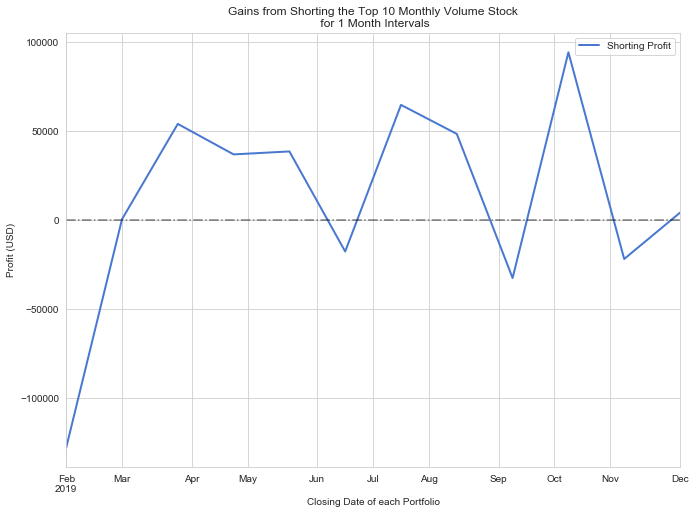

In [29]:
# show the monthly profit using a line chart
sns.set_style("whitegrid")

blue, = sns.color_palette("muted", 1)

monthlyshortprofit.plot(color=blue, linewidth=2, figsize=(11,8))
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.ylabel('Profit (USD)')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Gains from Shorting the Top 10 Monthly Volume Stock\n for 1 Month Intervals')

### Buy Portfolio

In [30]:
# only keep Robinhood data that are in the quandl tickers, majority is in there

data2 = data[data['Ticker'].isin(quandltickers['Ticker'])]
data2.dropna(how='all', inplace=True)
data2

C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,Ticker
A,12,-10,-3,-6,-6,8,17,37,9,4,...,-13,-14,6,36,-24,-25,15,5,5,A
AA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AA
AAAU,8,0,-4,7,7,5,16,12,5,5,...,-2,-1,-6,1,-5,-6,1,-7,5,AAAU
AACG,54,1,20,109,109,-7,46,12,67,21,...,-11,-5,-12,-18,3,-27,-11,1,-16,AACG
AADR,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,AADR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZUO,-2,1,27,1,1,31,6,-18,31,-44,...,-21,-15,-24,8,-29,11,-32,-11,-14,ZUO
ZVO,0,0,0,0,0,0,0,0,0,0,...,56,0,2,0,1,19,-8,-5,1,ZVO
ZYME,5,5,10,-3,-3,-4,0,0,7,4,...,20,0,-8,33,30,-8,-16,0,-3,ZYME
ZYNE,428,184,121,643,643,718,52,398,246,154,...,-121,-1,106,321,64,19,138,394,27,ZYNE


In [31]:
# create empty df to contain the concatination, just like creating empty list
buyportfolio = pd.DataFrame()


for a in range(1,50,4):
    buytmp = data2.sort_values(by=[a], ascending=True)[:10] # the index of data1 is ticker, we sort it by[1] first column and take the top 10
    buytmp1 = pd.DataFrame(buytmp[a].index) # then we do temp[1].index is getting the index (tickers)
    buytmp1.columns = [a] # rename the column to week 1 
    buyportfolio = pd.concat([buyportfolio, buytmp1], axis=1)# axis=1 concatinate along columns
buyportfolio

,1,5,9,13,17,21,25,29,33,37,41,45,49
0,EGO,FB,CRON,CRON,FB,GPRO,AAPL,AAPL,AAPL,TSLA,TSLA,TSLA,FIT
1,AMZN,NFLX,AMZN,FB,NFLX,PINS,NFLX,BA,CRON,BAC,AAPL,BABA,BABA
2,NBEV,AMD,AAPL,SRNE,CRON,ACB,AMZN,MU,MU,F,MSFT,AMD,CBAY
3,FB,NIO,PCG,TSLA,TWTR,NFLX,TSLA,TSLA,MSFT,BABA,ATVI,HEXO,MYOV
4,JD,BABA,KNDI,BABA,BAC,LYFT,SQ,LYFT,XXII,BA,AMD,NFLX,TSLA
5,MU,SQ,NBEV,BILI,BA,CRON,BA,AMD,CVS,NIO,FB,IQ,HEXO
6,CHK,FIT,GOOGL,TME,CRM,GERN,LYFT,WORK,ZNGA,CHK,HEXO,GRUB,CGC
7,TWTR,MU,EA,JD,GPRO,IQ,ZM,FB,BYND,AAPL,BABA,AMZN,UWT
8,GOOGL,VHI,FB,MU,AAPL,SQ,CRM,PLUG,NVDA,AMD,NFLX,FB,SQ
9,NKE,SGH,BAC,TWTR,SQ,UBER,CPRX,CRON,JD,NVDA,CRON,GOOGL,NFLX


In [32]:
data2.reset_index(inplace=True) # reset index replace old index with new numeric 012345 index for data 1
data2.head()

Week,index,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,Ticker
0,A,12,-10,-3,-6,-6,8,17,37,9,...,-13,-14,6,36,-24,-25,15,5,5,A
1,AA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AA
2,AAAU,8,0,-4,7,7,5,16,12,5,...,-2,-1,-6,1,-5,-6,1,-7,5,AAAU
3,AACG,54,1,20,109,109,-7,46,12,67,...,-11,-5,-12,-18,3,-27,-11,1,-16,AACG
4,AADR,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,AADR


In [33]:
# find the top 10 sold stocks for each week and display the volume

buyvol = []
i = 1
while i < 52:
    a = data2.sort_values(by=[i], ascending=True)[:10] #sorting data value by # of account purchased
    a.reset_index(inplace=True)# reset the index
    templist = a[i].tolist()# make a into a list
    buyvol.append(templist)
    i = i + 4
buyvol = pd.DataFrame(buyvol) # transform it into a dataframe
buyvol

,0,1,2,3,4,5,6,7,8,9
0,-7035,-1260,-1090,-724,-486,-456,-289,-267,-261,-236
1,-2471,-2016,-1013,-806,-731,-619,-520,-488,-413,-346
2,-3486,-2985,-1519,-1424,-1153,-994,-782,-668,-639,-535
3,-4199,-1651,-1517,-1140,-708,-636,-565,-522,-471,-446
4,-5052,-4429,-2096,-1723,-1374,-1260,-732,-689,-670,-633
5,-997,-824,-673,-648,-587,-577,-494,-488,-369,-366
6,-3764,-2932,-2332,-1858,-1322,-709,-688,-614,-513,-497
7,-1685,-1207,-1017,-974,-957,-948,-904,-785,-734,-693
8,-3623,-1405,-837,-738,-673,-589,-562,-558,-488,-481
9,-4861,-1837,-1630,-1564,-1469,-1403,-1378,-1303,-1296,-1079


In [34]:
buyportfolio1 = buyportfolio.T #transform ticker matrix so that it is consistant with the volume matrix
buyportfolio1

,0,1,2,3,4,5,6,7,8,9
1,EGO,AMZN,NBEV,FB,JD,MU,CHK,TWTR,GOOGL,NKE
5,FB,NFLX,AMD,NIO,BABA,SQ,FIT,MU,VHI,SGH
9,CRON,AMZN,AAPL,PCG,KNDI,NBEV,GOOGL,EA,FB,BAC
13,CRON,FB,SRNE,TSLA,BABA,BILI,TME,JD,MU,TWTR
17,FB,NFLX,CRON,TWTR,BAC,BA,CRM,GPRO,AAPL,SQ
21,GPRO,PINS,ACB,NFLX,LYFT,CRON,GERN,IQ,SQ,UBER
25,AAPL,NFLX,AMZN,TSLA,SQ,BA,LYFT,ZM,CRM,CPRX
29,AAPL,BA,MU,TSLA,LYFT,AMD,WORK,FB,PLUG,CRON
33,AAPL,CRON,MU,MSFT,XXII,CVS,ZNGA,BYND,NVDA,JD
37,TSLA,BAC,F,BABA,BA,NIO,CHK,AAPL,AMD,NVDA


In [35]:
buyportfolio1['Week'] = buyportfolio1.index # create a new column called week using the index
buyportfolio1

,0,1,2,3,4,5,6,7,8,9,Week
1,EGO,AMZN,NBEV,FB,JD,MU,CHK,TWTR,GOOGL,NKE,1
5,FB,NFLX,AMD,NIO,BABA,SQ,FIT,MU,VHI,SGH,5
9,CRON,AMZN,AAPL,PCG,KNDI,NBEV,GOOGL,EA,FB,BAC,9
13,CRON,FB,SRNE,TSLA,BABA,BILI,TME,JD,MU,TWTR,13
17,FB,NFLX,CRON,TWTR,BAC,BA,CRM,GPRO,AAPL,SQ,17
21,GPRO,PINS,ACB,NFLX,LYFT,CRON,GERN,IQ,SQ,UBER,21
25,AAPL,NFLX,AMZN,TSLA,SQ,BA,LYFT,ZM,CRM,CPRX,25
29,AAPL,BA,MU,TSLA,LYFT,AMD,WORK,FB,PLUG,CRON,29
33,AAPL,CRON,MU,MSFT,XXII,CVS,ZNGA,BYND,NVDA,JD,33
37,TSLA,BAC,F,BABA,BA,NIO,CHK,AAPL,AMD,NVDA,37


In [36]:
date = pd.read_csv('Robintrack-DATES.csv')
date = date[['Date', 'Week']]
date.head(3)

,Date,Week
0,12/28/2018,0
1,1/4/2019,1
2,1/11/2019,2


In [37]:
# obtain date corresponding the week number from robin data, and merge it with ticker matrix
buyportfolio1 = pd.merge(buyportfolio1, date[['Week','Date']], on=['Week'], how='left')
buyportfolio1['Date'] = pd.to_datetime(buyportfolio1['Date'])
buyportfolio1

,0,1,2,3,4,5,6,7,8,9,Week,Date
0,EGO,AMZN,NBEV,FB,JD,MU,CHK,TWTR,GOOGL,NKE,1,2019-01-04
1,FB,NFLX,AMD,NIO,BABA,SQ,FIT,MU,VHI,SGH,5,2019-02-01
2,CRON,AMZN,AAPL,PCG,KNDI,NBEV,GOOGL,EA,FB,BAC,9,2019-03-01
3,CRON,FB,SRNE,TSLA,BABA,BILI,TME,JD,MU,TWTR,13,2019-03-29
4,FB,NFLX,CRON,TWTR,BAC,BA,CRM,GPRO,AAPL,SQ,17,2019-04-26
5,GPRO,PINS,ACB,NFLX,LYFT,CRON,GERN,IQ,SQ,UBER,21,2019-05-24
6,AAPL,NFLX,AMZN,TSLA,SQ,BA,LYFT,ZM,CRM,CPRX,25,2019-06-21
7,AAPL,BA,MU,TSLA,LYFT,AMD,WORK,FB,PLUG,CRON,29,2019-07-19
8,AAPL,CRON,MU,MSFT,XXII,CVS,ZNGA,BYND,NVDA,JD,33,2019-08-16
9,TSLA,BAC,F,BABA,BA,NIO,CHK,AAPL,AMD,NVDA,37,2019-09-13


### Pulling Quandl Data for all Long Tickers

In [38]:
#keep only column 0-9
buytickers = buyportfolio1[[0,1,2,3,4,5,6,7,8,9]]
buytickers

,0,1,2,3,4,5,6,7,8,9
0,EGO,AMZN,NBEV,FB,JD,MU,CHK,TWTR,GOOGL,NKE
1,FB,NFLX,AMD,NIO,BABA,SQ,FIT,MU,VHI,SGH
2,CRON,AMZN,AAPL,PCG,KNDI,NBEV,GOOGL,EA,FB,BAC
3,CRON,FB,SRNE,TSLA,BABA,BILI,TME,JD,MU,TWTR
4,FB,NFLX,CRON,TWTR,BAC,BA,CRM,GPRO,AAPL,SQ
5,GPRO,PINS,ACB,NFLX,LYFT,CRON,GERN,IQ,SQ,UBER
6,AAPL,NFLX,AMZN,TSLA,SQ,BA,LYFT,ZM,CRM,CPRX
7,AAPL,BA,MU,TSLA,LYFT,AMD,WORK,FB,PLUG,CRON
8,AAPL,CRON,MU,MSFT,XXII,CVS,ZNGA,BYND,NVDA,JD
9,TSLA,BAC,F,BABA,BA,NIO,CHK,AAPL,AMD,NVDA


In [39]:
# stack all the tickers in the above table into one long column
buytickerlist = buytickers.stack().reset_index()
buytickerlist = buytickerlist[[0]]
buytickerlist # contains all the tickers in the ticker matrix 10 x 12

,0
0,EGO
1,AMZN
2,NBEV
3,FB
4,JD
...,...
125,HEXO
126,CGC
127,UWT
128,SQ


In [40]:
buytickerlist = buytickerlist[0].unique() #keep only the unique ones from tickerlist
buytickercount = pd.DataFrame(buytickerlist)
buytickercount.count()

0    55
dtype: int64

In [41]:
buypricedata = {}  # set up the dictionary 
for s in buytickerlist:
    buypricedata[s] = quandl.get("EOD/"+s, start_date="2018-12-01", end_date="2019-12-31") # for US stocks: quandl.get("EOD/"+s) 

In [42]:
# Create a price and trade volume dataframe
buyprc = pd.DataFrame()  # where to store the price data
for s in buypricedata:
    # get the returns
    tmpbuyprice = buypricedata[s][['Adj_Close']]  # IMPORTANT: if US stocks, use Adj_Close (includes dividends)
    tmpbuyprice.columns = [s]  # renaming the column with TICKER name
    buyprc = pd.concat([buyprc, tmpbuyprice], axis=1)
    buyprc = buyprc[buyprc.index.weekday < 5]  # get rid of weekend observations

In [43]:
#buyprc.to_csv(r'C:\Users\richa\Google Drive\MGFD40\Group Project\Task 2\Long_Quandle.csv', index = True)

###  Formatting Our Monthly Weighted Investments

In [44]:
#transpose
buymonthvol = buyvol.T
buymonthvol

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-7035,-2471,-3486,-4199,-5052,-997,-3764,-1685,-3623,-4861,-4928,-2953,-2356
1,-1260,-2016,-2985,-1651,-4429,-824,-2932,-1207,-1405,-1837,-3306,-1884,-1697
2,-1090,-1013,-1519,-1517,-2096,-673,-2332,-1017,-837,-1630,-2558,-1166,-1252
3,-724,-806,-1424,-1140,-1723,-648,-1858,-974,-738,-1564,-2380,-1109,-1191
4,-486,-731,-1153,-708,-1374,-587,-1322,-957,-673,-1469,-1830,-1035,-1093
5,-456,-619,-994,-636,-1260,-577,-709,-948,-589,-1403,-1627,-977,-911
6,-289,-520,-782,-565,-732,-494,-688,-904,-562,-1378,-1534,-861,-810
7,-267,-488,-668,-522,-689,-488,-614,-785,-558,-1303,-1274,-856,-716
8,-261,-413,-639,-471,-670,-369,-513,-734,-488,-1296,-1270,-829,-628
9,-236,-346,-535,-446,-633,-366,-497,-693,-481,-1079,-830,-748,-619


In [45]:
# calculate how much we should put into each stock if our initial investment is 500k
buymonthAlloc = (buymonthvol / buymonthvol.sum())*500000
buymonthAlloc

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,290606.411104,131115.356044,122876.277758,177098.270772,135384.285561,82766.063424,123580.011820,85066.639742,181987.140848,136391.694725,114407.763384,118899.983894,104497.471835
1,52048.909451,106972.301815,105216.778287,69633.066217,118689.034194,68404.449610,96263.707400,60934.975767,70574.643359,51543.209877,76751.636718,75857.626027,75268.340282
2,45026.437541,53751.459196,53542.474445,63981.442429,56168.935577,55869.168189,76564.449406,51342.891761,42043.399638,45735.129068,59386.172633,46947.978741,55530.914575
3,29907.468605,42767.696063,50193.866761,48080.978490,46173.223282,53793.790470,61002.035590,49172.051696,37070.524412,43883.277217,55253.749362,44652.923176,52825.334871
4,20076.007931,38788.071739,40641.522735,29860.818220,36820.666738,48729.868836,43404.031781,48313.812601,33805.505324,41217.732884,42485.025770,41673.377355,48478.665839
5,18836.748182,32845.166083,35037.010927,26824.124842,33765.676921,47899.717749,23277.956530,47859.450727,29586.096042,39365.881033,37772.205971,39338.057658,40406.280493
6,11938.202247,27592.061976,27564.328516,23829.607760,19616.250402,41009.463722,22588.482500,45638.126010,28229.857344,38664.421998,35613.130891,34667.418264,35926.550164
7,11029.411765,25894.088931,23545.999295,22016.026993,18463.929682,40511.373070,20158.907348,39630.452342,28028.933092,36560.044893,29577.007011,34466.097600,31757.296194
8,10781.559815,21914.464608,22523.792739,19865.035850,17954.764712,30632.575129,16842.865585,37055.735057,24512.758690,36363.636364,29484.143567,33378.966017,27854.164819
9,9748.843358,18359.333546,18857.948537,18810.628427,16963.232930,30383.529802,16317.552039,34985.864297,24161.141250,30274.971942,19269.164693,30117.571268,27454.980928


### Formatting Our DataFrame to turn create a row for each data for each stock for easy identification

In [46]:
# for all the 12 intervals (4 week per interval) we get the price for all stocks we have for that day
buyfilterprice = buyprc[buyprc.index.isin(buyportfolio1['Date'])] # only price that is on date of our ticker date to easy call rows in final loop 
buyfilterprice = buyfilterprice.T
buydate = buyfilterprice.columns
buydate = pd.DataFrame(buydate)
buydate = buydate.T
buydate.columns = buydate.loc['Date']
buyfilterprice = buyfilterprice.append(buydate)
buyfilterprice.loc['Date'] = pd.to_datetime(buyfilterprice.loc['Date'], format='%Y-%m-%d')
buyfilterprice = buyfilterprice[:55]
buyfilterprice.head()

Date,2019-01-04,2019-02-01,2019-03-01,2019-03-29,2019-04-26,2019-05-24,2019-06-21,2019-07-19,2019-08-16,2019-09-13,2019-10-11,2019-11-08,2019-12-06
EGO,3.27,3.98,4.2,4.63,4.31,3.11,5.43,7.68,8.62,8.29,7.39,7.7,7.3
AMZN,1575.39,1626.23,1671.73,1780.75,1950.63,1823.28,1911.3,1964.52,1792.57,1839.34,1731.92,1785.88,1751.6
NBEV,5.42,7.15,5.89,5.26,5.52,5.44,4.6,4.05,3.46,3.22,2.665,2.62,2
FB,137.95,165.71,162.28,166.69,191.49,181.06,191.14,198.36,183.7,187.19,184.19,190.84,201.05
JD,22.27,24.63,28.73,30.15,29.13,26.32,29.06,30.99,31.29,31.23,29.71,33.23,32.93


In [47]:
# turn the data in the previous table into 1 giant list for easy merge
myList = []


for x in range(len(buyfilterprice)):
    name = buyfilterprice.iloc[x].name
    columnIterator = 0
    for y in range(len(buyfilterprice.iloc[x])):
        date = buyfilterprice.columns[columnIterator]
        columnIterator = columnIterator + 1        
        price = buyfilterprice.iloc[x][y]
        myRow = []
        myRow.append(name)
        myRow.append(date)
        myRow.append(price)
        myList.append(myRow)
       
allbuyprice = pd.DataFrame(myList)
allbuyprice.rename(columns={0: 'Ticker', 1: 'Date', 2: 'Price'}, inplace=True)
allbuyprice['Closing Date'] = allbuyprice['Date']
allbuyprice['Closing Price'] = allbuyprice['Price']
allbuyprice


,Ticker,Date,Price,Closing Date,Closing Price
0,EGO,2019-01-04,3.27,2019-01-04,3.27
1,EGO,2019-02-01,3.98,2019-02-01,3.98
2,EGO,2019-03-01,4.20,2019-03-01,4.20
3,EGO,2019-03-29,4.63,2019-03-29,4.63
4,EGO,2019-04-26,4.31,2019-04-26,4.31
...,...,...,...,...,...
710,UWT,2019-08-16,11.53,2019-08-16,11.53
711,UWT,2019-09-13,11.40,2019-09-13,11.40
712,UWT,2019-10-11,10.58,2019-10-11,10.58
713,UWT,2019-11-08,12.02,2019-11-08,12.02


### Creating Final Buy Portfolio DataFrame with all of the profits for investing 500K each month and holding for 1 month

In [48]:
# create a df containing the closing price and profit from a short position for each stock at each date 
buyportList = []
for x in range(0, 12):
    port2 = buyportfolio1.iloc[x]
    port2 = pd.DataFrame(port2)
    port2['Date'] = pd.to_datetime(port2.loc['Date'])
    port2.loc[:, 'Date'] = np.where(port2['Date'] == 'NaT', port2.loc['Date', x], port2.loc['Date', x])
    port2 = port2[:10]
    port2.rename(columns={x: 'Ticker'}, inplace=True)
    
    tmpport = buyportfolio1.iloc[x+1]
    tmpport = pd.DataFrame(tmpport)
    tmpport['Closing Date'] = pd.to_datetime(tmpport.loc['Date'])
    tmpport.loc[:, 'Closing Date'] = np.where(tmpport['Closing Date'] == 'NaT', tmpport.loc['Date', x+1], tmpport.loc['Date', x+1])
    tmpport = tmpport[['Closing Date']][:10]

    port2 = pd.merge(port2, allbuyprice[['Date', 'Price', 'Ticker']], on=['Date', 'Ticker'], how='left')
    port2 = pd.concat([port2, tmpport], axis=1)
    port2 = pd.merge(port2, allbuyprice[['Closing Date', 'Closing Price', 'Ticker']], on=['Closing Date', 'Ticker'], how='left')
    
    port2['Short Price Change'] = port2['Closing Price'] - port2['Price']
    port2['Number of Shares'] = (buymonthAlloc[x] / port2['Price']).round()
    port2['Profit'] = (port2['Number of Shares'] * port2['Short Price Change']).round(2)

    buyportList.append(port2)
finalbuyport = pd.concat(buyportList)
finalbuyport

,Ticker,Date,Price,Closing Date,Closing Price,Short Price Change,Number of Shares,Profit
0,EGO,2019-01-04,3.27,2019-02-01,3.98,0.71,88870.0,63097.70
1,AMZN,2019-01-04,1575.39,2019-02-01,1626.23,50.84,33.0,1677.72
2,NBEV,2019-01-04,5.42,2019-02-01,7.15,1.73,8307.0,14371.11
3,FB,2019-01-04,137.95,2019-02-01,165.71,27.76,217.0,6023.92
4,JD,2019-01-04,22.27,2019-02-01,24.63,2.36,901.0,2126.36
...,...,...,...,...,...,...,...,...
5,IQ,2019-11-08,19.52,2019-12-06,20.29,0.77,2015.0,1551.55
6,GRUB,2019-11-08,36.19,2019-12-06,41.01,4.82,958.0,4617.56
7,AMZN,2019-11-08,1785.88,2019-12-06,1751.60,-34.28,19.0,-651.32
8,FB,2019-11-08,190.84,2019-12-06,201.05,10.21,175.0,1786.75


In [49]:
# aggregate and show the monthly short profit
monthlybuy = finalbuyport[['Closing Date', 'Profit']]
monthlybuy.rename(columns={'Profit': 'Long Profit'}, inplace=True)
monthlybuyprofit = monthlybuy.groupby(by='Closing Date', as_index=False).sum().reset_index(drop=True)
monthlybuyprofit.set_index('Closing Date', inplace=True)

monthlybuyprofit

,Long Profit
Closing Date,
2019-02-01,96893.11
2019-03-01,25168.19
2019-03-29,-21183.11
2019-04-26,-21596.31
2019-05-24,-27652.15
2019-06-21,-2879.82
2019-07-19,5900.02
2019-08-16,-42468.64
2019-09-13,31241.02


Text(0.5, 1.0, 'Gains from Buying the Lowest 10 Monthly Volume Stock\n for 1 Month Intervals')

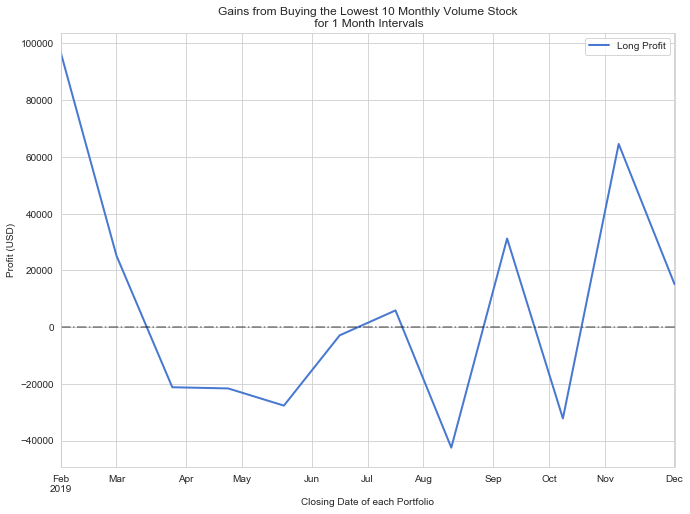

In [50]:
# show the monthly profit using a line chart
sns.set_style("whitegrid")

blue, = sns.color_palette("muted", 1)

monthlybuyprofit.plot(color=blue, linewidth=2, figsize=(11,8))
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.ylabel('Profit (USD)')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Gains from Buying the Lowest 10 Monthly Volume Stock\n for 1 Month Intervals')


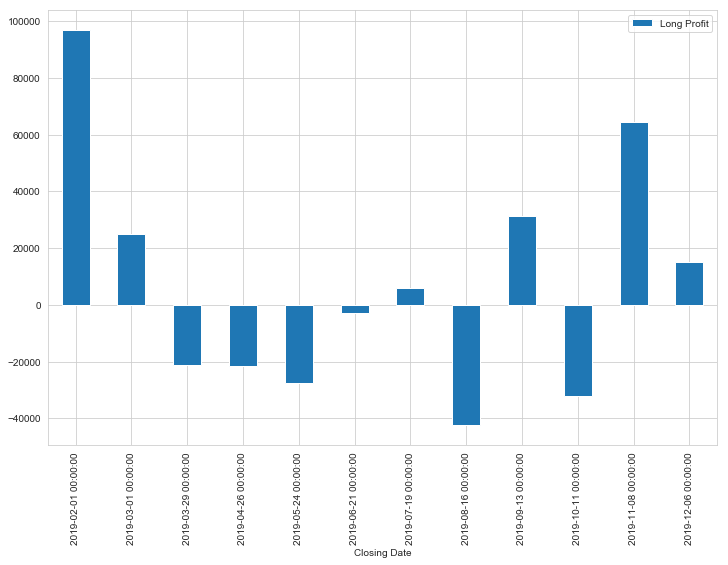

In [51]:
# showing the returns using bar charts
monthlybuyprofit.plot.bar(figsize=(12,8))

### Comparing the Short v Buy Portfolio!

In [52]:
# compare the short and long portfolio without the jan effectq
monthlyshortprofit['Date'] = monthlyshortprofit.index 
monthlybuyprofit['Date'] = monthlybuyprofit.index
buyvsellprofit = pd.merge(monthlyshortprofit, monthlybuyprofit[['Long Profit','Date']], on=['Date'], how='left')
buyvsellprofit.set_index('Date', inplace=True)
buyvsellprofit

#((profit+500k)/500)-1
# 

,Shorting Profit,Long Profit
Date,,
2019-02-01,-127772.61,96893.11
2019-03-01,439.10,25168.19
2019-03-29,53972.77,-21183.11
2019-04-26,36857.20,-21596.31
2019-05-24,38518.03,-27652.15
2019-06-21,-17655.05,-2879.82
2019-07-19,64647.07,5900.02
2019-08-16,48363.12,-42468.64
2019-09-13,-32550.25,31241.02


Text(0.5, 1.0, 'Gains from Buying & Shorting Monthly Volume Stock\n for 1 Month Intervals')

<Figure size 432x288 with 0 Axes>

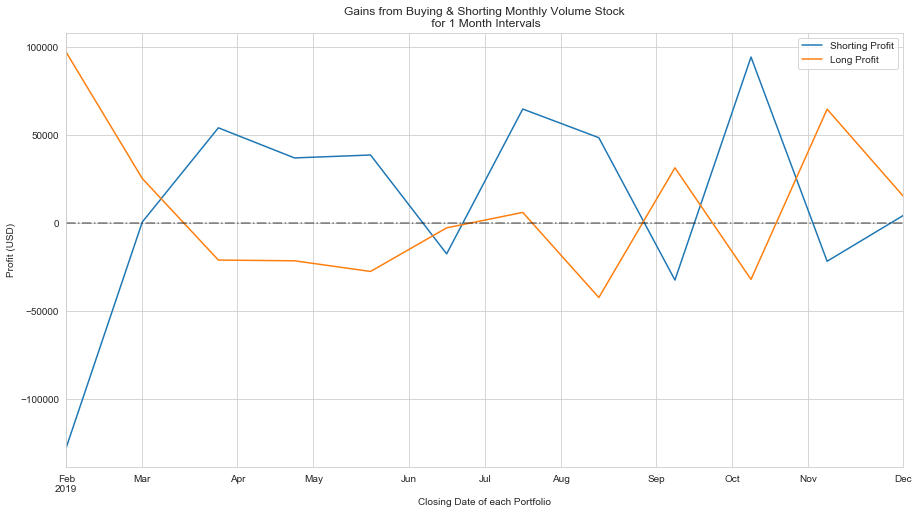

In [53]:
#compare long and short profit using line chart
fig = plt.figure() # initiate the figure environment
sns.set_style("whitegrid")

blue, = sns.color_palette("muted", 1)
buyvsellprofit.plot(figsize=(15,8))
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.ylabel('Profit (USD)')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Gains from Buying & Shorting Monthly Volume Stock\n for 1 Month Intervals')

Text(0, 0.5, 'Profit (USD)')

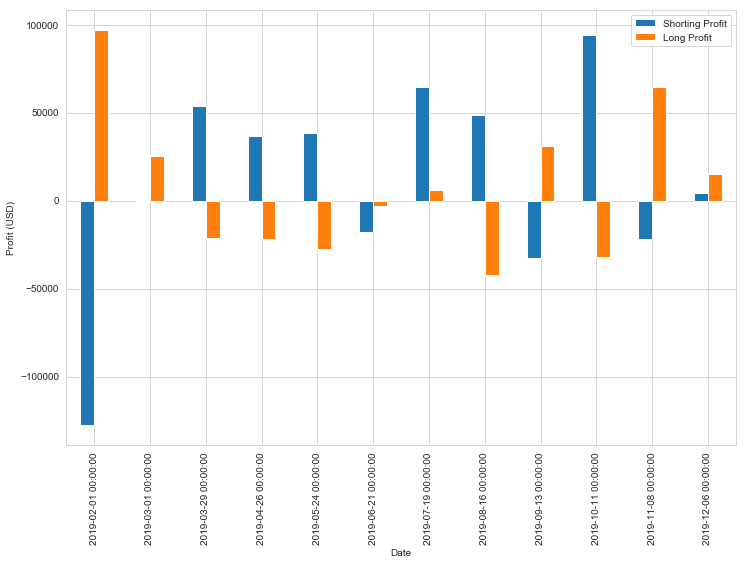

In [54]:
#compare long and short profit using bar chart
buyvsellprofit.plot.bar(figsize=(12,8))
plt.ylabel('Profit (USD)')

In [55]:
lprofit = float(monthlybuyprofit.sum())
lprofit

90980.62999999999

In [56]:
sprofit = float(monthlyshortprofit.sum())
sprofit

141274.62999999995

### What if we remove the January Effect?

In [57]:
# start from the 2nd month
nojan = buyvsellprofit[1:12]

Text(0.5, 1.0, 'Gains from Buying & Shorting Monthly Volume Stock\n for 1 Month Intervals \n Excluding January')

<Figure size 432x288 with 0 Axes>

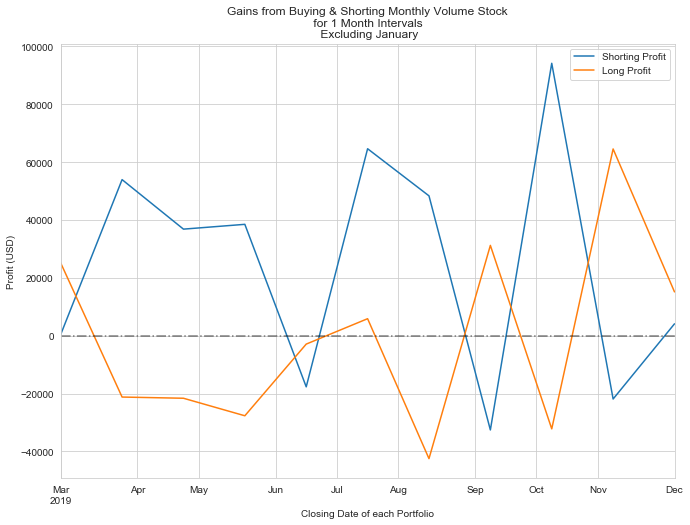

In [58]:
# plot the short and long profit without the january effect
fig = plt.figure() # initiate the figure environment

nojan.plot(figsize=(11,8))
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.ylabel('Profit (USD)')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Gains from Buying & Shorting Monthly Volume Stock\n for 1 Month Intervals \n Excluding January')

In [59]:
nojan['Long Profit'].sum()

-5912.479999999998

In [60]:
nojan['Shorting Profit'].sum()

269047.24

### Comparing to the S&P Index

#### Load in S&P Data

In [61]:
#obtain spy data
indexpricedata = quandl.get("EOD/SPY", start_date="2018-12-01", end_date="2019-12-31") # for US stocks: quandl.get("EOD/"+s) 

In [62]:
indexpricedata = indexpricedata[['Adj_Close']]
indexpricedata.head()

,Adj_Close
Date,
2018-12-03,270.825273
2018-12-04,262.049875
2018-12-06,261.652316
2018-12-07,255.572565
2018-12-10,256.057393


In [63]:
#reset index on spy adjusted close
indexreturn = indexpricedata
indexreturn['Date'] = indexreturn.index
indexreturn.reset_index(drop=True, inplace=True)
indexreturn


,Adj_Close,Date
0,270.825273,2018-12-03
1,262.049875,2018-12-04
2,261.652316,2018-12-06
3,255.572565,2018-12-07
4,256.057393,2018-12-10
...,...,...
266,319.268674,2019-12-24
267,320.968234,2019-12-26
268,320.888722,2019-12-27
269,319.119590,2019-12-30


### Format the S&P Data to get the  Return for the Correct Dates based off our analysis

In [64]:
datelist = pd.DataFrame(buyvsellprofit.index)
datelist = datelist.shift()
datelist.loc[0] = pd.to_datetime('2019-01-04')
datelist.loc[12] = pd.to_datetime('2019-12-06')
datelist

,Date
0,2019-01-04
1,2019-02-01
2,2019-03-01
3,2019-03-29
4,2019-04-26
5,2019-05-24
6,2019-06-21
7,2019-07-19
8,2019-08-16
9,2019-09-13


In [65]:
#merge date and adj close
datelist = pd.merge(datelist, indexreturn[['Adj_Close','Date']], on=['Date'], how='left')
datelist

,Date,Adj_Close
0,2019-01-04,246.191240
1,2019-02-01,263.427260
2,2019-03-01,273.532816
3,2019-03-29,276.750039
4,2019-04-26,287.458330
5,2019-05-24,277.043954
6,2019-06-21,289.438923
7,2019-07-19,292.559744
8,2019-08-16,284.368819
9,2019-09-13,296.418930


In [66]:
#put the reutrns into a temperary list
tmplist = []
tmplist1 = []
for i in range(0,12):
    tmplist = (datelist.loc[i+1]['Adj_Close'] - datelist.loc[i]['Adj_Close'])/ datelist.loc[i]['Adj_Close']
    tmplist1.append(tmplist)
tmplist1

[0.070010697729704,
 0.03836184551581146,
 0.011761745246053248,
 0.03869300481449999,
 -0.03622916737670841,
 0.04474008062805001,
 0.010782312925170102,
 -0.02799744254130621,
 0.04237493508741544,
 -0.011410732084494132,
 0.04272985014175778,
 0.019194665630866886]

In [67]:
datelist = datelist[1:]
datelist.reset_index(drop=True, inplace=True)
datelist

,Date,Adj_Close
0,2019-02-01,263.427260
1,2019-03-01,273.532816
2,2019-03-29,276.750039
3,2019-04-26,287.458330
4,2019-05-24,277.043954
5,2019-06-21,289.438923
6,2019-07-19,292.559744
7,2019-08-16,284.368819
8,2019-09-13,296.418930
9,2019-10-11,293.036573


In [68]:
# mark every 4 week period using a dummy variable
tmplist1 = pd.DataFrame(tmplist1)

dfindex = pd.concat([datelist, tmplist1], axis=1)
dfindex.rename(columns={0: 'S&P Return'}, inplace=True)
dfindex['Dummy'] = dfindex.index
dfindex

,Date,Adj_Close,S&P Return,Dummy
0,2019-02-01,263.427260,0.070011,0
1,2019-03-01,273.532816,0.038362,1
2,2019-03-29,276.750039,0.011762,2
3,2019-04-26,287.458330,0.038693,3
4,2019-05-24,277.043954,-0.036229,4
5,2019-06-21,289.438923,0.044740,5
6,2019-07-19,292.559744,0.010782,6
7,2019-08-16,284.368819,-0.027997,7
8,2019-09-13,296.418930,0.042375,8
9,2019-10-11,293.036573,-0.011411,9


### Calculate Returns and Realized Returns. Also Merging S&P Returns with our Portfolio Returns

In [69]:
buyvsellprofit['Long Return'] = (((buyvsellprofit['Long Profit']+ 500000)/500000)-1)
buyvsellprofit['Short Return'] = (((buyvsellprofit['Shorting Profit']+ 500000)/500000)-1)

In [70]:
# calculate portfolio return vs snp return, present short and long alpha
returns = pd.DataFrame()
returns = buyvsellprofit[['Long Return','Short Return']]
returns['Combined Return'] = returns.mean(axis=1)

returns['Date'] = returns.index
returns.reset_index(drop=True, inplace=True)
returns['Dummy'] = returns.index

returns = pd.merge(returns, dfindex[['S&P Return','Dummy']], on=['Dummy'], how='left')
returns.drop(columns ='Dummy', inplace=True)
returns['Combined Alpha'] = returns['Combined Return'] - returns['S&P Return']
returns['Short Alpha'] = returns['Long Return'] - returns['S&P Return']
returns['Long Alpha'] = returns['Short Return'] - returns['S&P Return']

#returns['Annualized Return'] =  (((1+returns['Alpha']).pow(12))-1) #DOUBLE CHECK
returns.rename(columns={'Date': 'Closing Date'}, inplace=True)
returns.set_index('Closing Date', inplace=True)

returns


C:\Users\richa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Long Return,Short Return,Combined Return,S&P Return,Combined Alpha,Short Alpha,Long Alpha
Closing Date,,,,,,,
2019-02-01,0.193786,-0.255545,-0.030880,0.070011,-0.100890,0.123776,-0.325556
2019-03-01,0.050336,0.000878,0.025607,0.038362,-0.012755,0.011975,-0.037484
2019-03-29,-0.042366,0.107946,0.032790,0.011762,0.021028,-0.054128,0.096184
2019-04-26,-0.043193,0.073714,0.015261,0.038693,-0.023432,-0.081886,0.035021
2019-05-24,-0.055304,0.077036,0.010866,-0.036229,0.047095,-0.019075,0.113265
2019-06-21,-0.005760,-0.035310,-0.020535,0.044740,-0.065275,-0.050500,-0.080050
2019-07-19,0.011800,0.129294,0.070547,0.010782,0.059765,0.001018,0.118512
2019-08-16,-0.084937,0.096726,0.005894,-0.027997,0.033892,-0.056940,0.124724
2019-09-13,0.062482,-0.065101,-0.001309,0.042375,-0.043684,0.020107,-0.107475


Text(0.5, 1.0, 'Long Return of Portfolio Vs. S&P Index Returns')

<Figure size 432x288 with 0 Axes>

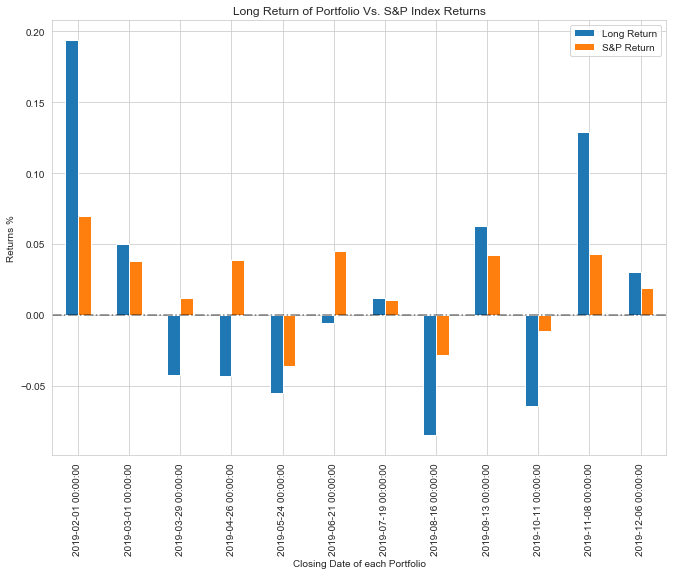

In [71]:
# graph the long returns against snp returns
returnsplot = returns[['Long Return', 'S&P Return']]

fig = plt.figure() # initiate the figure environment

returnsplot.plot.bar(figsize=(11,8))
plt.axhline(y= 0 , color='k', linestyle='-.', alpha=.5)
plt.ylabel('Returns %')
plt.xlabel('Closing Date of each Portfolio')
plt.title('Long Return of Portfolio Vs. S&P Index Returns')

Text(0.5, 1.0, 'Long Returns of Portfolio Vs. S&P Index Returns')

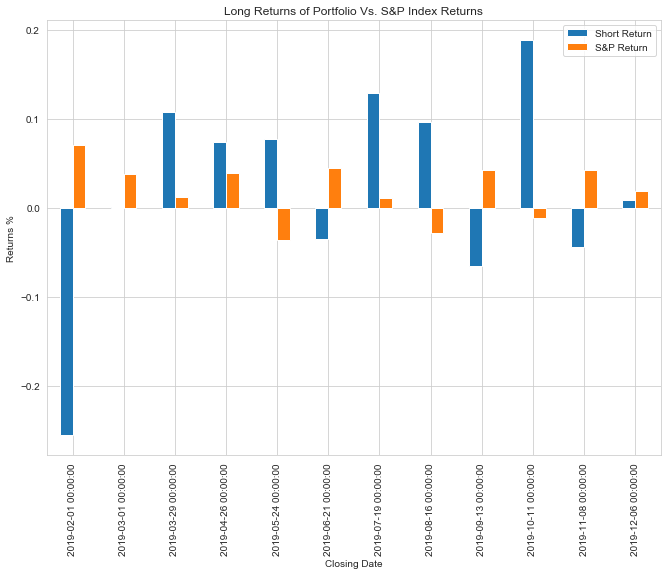

In [72]:
# graph the short returns against snp returns
returnsplot = returns[['Short Return', 'S&P Return']]
returnsplot.plot.bar(figsize=(11,8))
plt.ylabel('Returns %')
plt.title('Long Returns of Portfolio Vs. S&P Index Returns')

### Average Return 

In [73]:
returns = returns[['Long Return','Short Return','Combined Return','S&P Return']]
returns = returns.sum()/12
avgreturns = pd.DataFrame(returns)
avgreturns.rename(columns={0:'Returns'}, inplace=True)
avgreturns

,Returns
Long Return,0.015163
Short Return,0.023546
Combined Return,0.019355
S&P Return,0.020251


Text(0.5, 1.0, 'Returns of Portfolio Vs. S&P Index Returns')

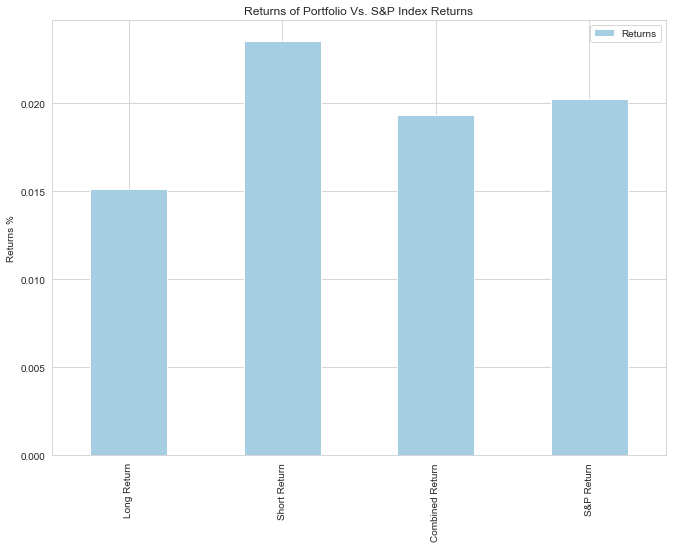

In [74]:
# plot the average returns for long, short, compined, and snp portfolio
avgreturns.plot(kind='bar', stacked=True, colormap='Paired', figsize=(11,8))
#.plot.bar()
plt.ylabel('Returns %')
plt.title('Returns of Portfolio Vs. S&P Index Returns')